In [27]:
import matplotlib.pyplot as plt

In [33]:
call=[[580,56.65],[590,49.3],[600,42.7],[610,36.65],[620,31.35],[630,26.4],[640,22.2],[650,18.15],[660,14.95]]
s0=622.7

In [71]:
def buy_butterfly(K1,c_K1,K2,c_K2,K3,c_K3):
    x=[]
    y=[]
    term = 2*c_K2 - (c_K1 + c_K3)
    for i in range(int(s0)-100,K3+100):
        x.append(i)
        if i<=K1:
            y.append(term)
        elif i<K2:
            y.append(i-K1+term)
        elif i<K3:
            y.append(-i+2*K2-K1+term)
        elif i>=K3:
            y.append(term)
    return round(abs(max(y)/y[0]),2)
def sell_butterfly(K1,c_K1,K2,c_K2,K3,c_K3):
    
    x=[]
    y=[]
    term = -2*c_K2 + c_K1 + c_K3
    for i in range(int(s0)-100,K3+100):
        x.append(i)
        if i<=K1:
            y.append(term)
        elif i<K2:
            y.append(-i+K1+term)
        elif i<K3:
            y.append(i-2*K2+K1+term)
        elif i>=K3:
            y.append(term)
    return round(abs(max(y)/min(y)),2)

def payoff_buy(s0,K1,c_K1,K2,c_K2,K3,c_K3):
    x=[]
    y=[]
    term = 2*c_K2 - (c_K1 + c_K3)
    for i in range(int(s0)-30,K3+30):
        x.append(i)
        if i<=K1:
            y.append(term)
        elif i<K2:
            y.append(i-K1+term)
        elif i<K3:
            y.append(-i+2*K2-K1+term)
        elif i>=K3:
            y.append(term)
    plt.figure(figsize=(16,6))
    plt.plot(x,y)
    plt.axhline(y[0],ls=":",label=round(y[0],2))
    plt.axvline(K1,ls=":",color="green")
    plt.axvline(K2,ls=":",color="green")
    plt.axvline(K3,ls=":",color="green")
    plt.axvline(s0,ls=":",color="red")
    plt.text(s0,0,s0,horizontalalignment='left',verticalalignment="bottom",fontsize=12,color="red")
    
    plt.axhline(max(y),ls=":",label=round(max(y),2))
    plt.axhline(0,color="k",ls=":")
    plt.xlabel("Stock Price at Expiry")
    plt.ylabel("Payout")
    plt.legend(loc=5)
    plt.title("R2R = "+str(round(abs(max(y)/y[0]),2)))

def payoff_sell(s0,K1,c_K1,K2,c_K2,K3,c_K3):
    x=[]
    y=[]
    term = -2*c_K2 + c_K1 + c_K3
    for i in range(int(s0)-50,K3+50):
        x.append(i)
        if i<=K1:
            y.append(term)
        elif i<K2:
            y.append(-i+K1+term)
        elif i<K3:
            y.append(i-2*K2+K1+term)
        elif i>=K3:
            y.append(term)
    plt.figure(figsize=(16,6))
    plt.plot(x,y)
    plt.axhline(y[0],ls=":",label=round(y[0],2))
    plt.axvline(K1,ls=":",color="green")
    plt.axvline(K2,ls=":",color="green")
    plt.axvline(K3,ls=":",color="green")
    plt.axvline(s0,ls=":",color="red")
    plt.text(s0,0,s0,horizontalalignment='left',verticalalignment="bottom",fontsize=12,color="red")
    
    plt.axhline(min(y),ls=":",label=round(min(y),2))
    plt.axhline(0,color="k",ls=":")
    plt.xlabel("Stock Price at Expiry")
    plt.ylabel("Payout")
    plt.legend(loc=5)
    plt.title("R2R = "+str(round(abs(max(y)/min(y)),2)))

[27.57, 610, 36.65, 620, 31.35, 630, 26.4]


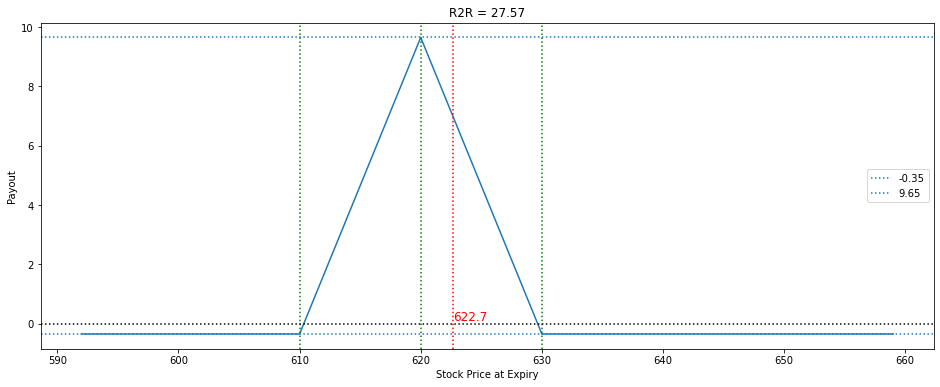

In [72]:
t=0
n=len(call)

for i in range(n):
    if call[i][0]<s0:
        t=i

val=min(t,n-1-t)
soln = [0,0,0,0,0,0,0]
for j in range(1,val+1):
    
    K1=call[t-j][0]
    c_K1 = call[t-j][1]
    K2=call[t][0]
    c_K2 = call[t][1]
    K3=call[t+j][0]
    c_K3 = call[t+j][1]
    r2r = buy_butterfly(K1,c_K1,K2,c_K2,K3,c_K3)
    if r2r>soln[0]:
        soln = [r2r,K1,c_K1,K2,c_K2,K3,c_K3]
print(soln)
payoff_buy(s0,soln[1],soln[2],soln[3],soln[4],soln[5],soln[6])

[0.29, 580, 56.65, 620, 31.35, 660, 14.95]


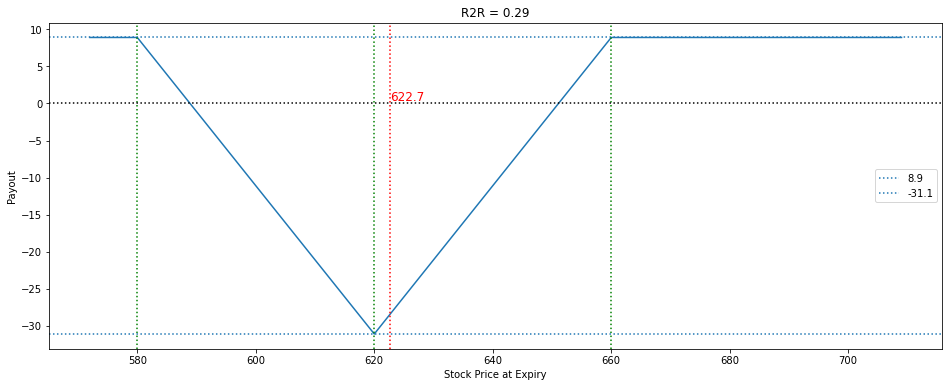

In [73]:
t=0
n=len(call)

for i in range(n):
    if call[i][0]<s0:
        t=i

val=min(t,n-1-t)
soln = [0,0,0,0,0,0,0]
for j in range(1,val+1):
    
    K1=call[t-j][0]
    c_K1 = call[t-j][1]
    K2=call[t][0]
    c_K2 = call[t][1]
    K3=call[t+j][0]
    c_K3 = call[t+j][1]
    r2r = sell_butterfly(K1,c_K1,K2,c_K2,K3,c_K3)
    if r2r>soln[0]:
        soln = [r2r,K1,c_K1,K2,c_K2,K3,c_K3]
print(soln)
payoff_sell(s0,soln[1],soln[2],soln[3],soln[4],soln[5],soln[6])